### Ref Funcs

In [ ]:
def print_dict(d, depth=0, _space=0, with_value=False,
               only_first_sample=False,
               only_key: str = None, only_key_ind: int = None
               ):
    
    r""""
    Args:
        - depth: Print all nested dictionaries upto a specific depth
        - _space: Space to leave for a certain depth dictionary items
        - with_value: Print values if at the final depth
        - only_first_sample: Only print the first key (and value) of the dictionary
        - only_key: Only print the given key info
        - only_key_ind: Only print the key info corresponding to the given key index
    """

    assert isinstance(d, dict), "Provided Input is not a Dictionary!"

    if only_key is not None: print_dict(d[key], depth, _space, with_value, only_first_sample)
    
    elif only_key_ind is not None: 
        keys_list = list(d.keys())
        key = keys_list[only_key_ind]
        print_dict(d[key], depth, _space, with_value, only_first_sample)

    else:
        for count, key in enumerate(d):
            
            print_text = " "*_space + f" - {key}"
            if not isinstance(d[key], dict) and with_value: print_text += f": {d[key]}"
            print(print_text)
            
            if depth>0: 
                if not isinstance(d[key], dict): continue
                print_dict(d[key], depth-1, _space+3, with_value)

            if only_first_sample: return

In [4]:
def train_time(iter_per_s, 
               num_samples = 30462,
               batch_size = 8,
               num_epochs=150):
    
    num_iters = num_samples // batch_size
    print(f"Num Iters: {num_iters}")

    one_iter = 1/iter_per_s
    one_epoch = one_iter * num_iters
    one_exp = one_epoch * num_epochs

    print(f"Time for \n - One Epoch: {round(one_epoch / 60, 3)} mins \n - One Exp: {round(one_exp / (60), 3)} mins / {round(one_exp / (60 * 60), 3)} hours / {round(one_exp / (60 * 60 * 24), 3)} days")

#train_time(iter_per_s = 10, num_samples=10000, num_epochs=1, batch_size=1)
# train_time(iter_per_s = 3.9, num_samples=2500)
# train_time(iter_per_s = 4.2, num_samples=2500)
train_time(iter_per_s = 1.7, num_samples=2500, num_epochs=10)

Num Iters: 312
Time for 
 - One Epoch: 3.059 mins 
 - One Exp: 30.588 mins / 0.51 hours / 0.021 days


In [5]:
train_time(1.6)

Num Iters: 3807
Time for 
 - One Epoch: 39.656 mins 
 - One Exp: 5948.438 mins / 99.141 hours / 4.131 days


In [5]:
from math import floor

def conv_out_size(W, K, P, S):

    return floor((W-K+2*P)/S) + 1

conv_out_size(W = 119,
              K = 6,
              P = 6//2,
              S=1)

120

### Download LIP Dataset

In [ ]:
import kagglehub

# path = kagglehub.dataset_download("roneoz/lip-dataset")
# path

/mnt/anaconda3/envs/schp_mod/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [9]:
import os

check_path = "data/"

check_dirs = ["train_images", "train_segmentations", "val_images", "val_segmentations"]
for d in check_dirs:
    dir_path = os.path.join(check_path, d)

    print(f"Num Files in {d}: {len(os.listdir(dir_path))}")

print("\n")

check_txts = ["train_id.txt", "val_id.txt"]
for t in check_txts:

    txt_path = os.path.join(check_path, t)

    with open(txt_path, "r") as f:
        txt_data = f.readlines()

    print(f"Num Image IDs in {txt_path}: {len(txt_data)}")

Num Files in train_images: 30462
Num Files in train_segmentations: 30462
Num Files in val_images: 10000
Num Files in val_segmentations: 10000


Num Image IDs in data/train_id.txt: 30462
Num Image IDs in data/val_id.txt: 10000


### Rough

In [38]:
import numpy as np

In [47]:
def get_palette(num_cls):
    """ Returns the color map for visualizing the segmentation mask.
    Args:
        num_cls: Number of classes
    Returns:
        The color map
    """
    n = num_cls
    palette = [0] * (n * 3)
    for j in range(0, n):
        lab = j
        palette[j * 3 + 0] = 0
        palette[j * 3 + 1] = 0
        palette[j * 3 + 2] = 0
        i = 0
        while lab:
            palette[j * 3 + 0] |= (((lab >> 0) & 1) << (7 - i))
            palette[j * 3 + 1] |= (((lab >> 1) & 1) << (7 - i))
            palette[j * 3 + 2] |= (((lab >> 2) & 1) << (7 - i))
            i += 1
            lab >>= 3
    return palette


num_cls = 2
palette = get_palette(num_cls)
arr = np.array([palette[k:k+3] for k in np.arange(0, num_cls*3, 3)])
arr

array([[  0,   0,   0],
       [128,   0,   0]])

In [31]:
lab = 1
k = 0
k_final = 3

print(lab >> k)
print(lab << k)
print(lab >>= k_final)

SyntaxError: invalid syntax (1603382187.py, line 7)

In [26]:
lab << 0

3

### Freezing SCHP Modules

In [1]:
import networks

model = networks.init_model("resnet101_multiscale", 
                                  num_classes=20, 
                                  pretrained='./pretrain_model/resnet101-imagenet.pth')

/mnt/anaconda3/envs/schp_mod/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
modules = {}

for count, i in enumerate(model.named_modules()):
    # print(f"\n\n {count} : {i} \n\n")

    modules[i[0]] = i[1]

In [6]:
print_dict(modules, with_value=False)

 - 
 - conv1
 - bn1
 - relu1
 - conv2
 - bn2
 - relu2
 - conv3
 - bn3
 - relu3
 - maxpool
 - layer1
 - layer1.0
 - layer1.0.conv1
 - layer1.0.bn1
 - layer1.0.conv2
 - layer1.0.bn2
 - layer1.0.conv3
 - layer1.0.bn3
 - layer1.0.relu
 - layer1.0.relu_inplace
 - layer1.0.downsample
 - layer1.0.downsample.0
 - layer1.0.downsample.1
 - layer1.1
 - layer1.1.conv1
 - layer1.1.bn1
 - layer1.1.conv2
 - layer1.1.bn2
 - layer1.1.conv3
 - layer1.1.bn3
 - layer1.1.relu
 - layer1.1.relu_inplace
 - layer1.2
 - layer1.2.conv1
 - layer1.2.bn1
 - layer1.2.conv2
 - layer1.2.bn2
 - layer1.2.conv3
 - layer1.2.bn3
 - layer1.2.relu
 - layer1.2.relu_inplace
 - layer2
 - layer2.0
 - layer2.0.conv1
 - layer2.0.bn1
 - layer2.0.conv2
 - layer2.0.bn2
 - layer2.0.conv3
 - layer2.0.bn3
 - layer2.0.relu
 - layer2.0.relu_inplace
 - layer2.0.downsample
 - layer2.0.downsample.0
 - layer2.0.downsample.1
 - layer2.1
 - layer2.1.conv1
 - layer2.1.bn1
 - layer2.1.conv2
 - layer2.1.bn2
 - layer2.1.conv3
 - layer2.1.bn3
 - lay

In [5]:
module = getattr(model, "fusion")

In [6]:
attrs = [a for a in dir(model) if a.__contains__("fusion")]
attrs

['fusion_edges', 'fusion_multi']

In [10]:
sum(p.numel() for p in model.fusion_edges.parameters())

37636

In [ ]:
for param in getattr(model, "fusion_edges").parameters:
    

Fusion_Conv_Attention(
  (sa): Sequential(
    (0): Conv2d(1024, 4, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2), groups=4)
    (1): Sigmoid()
  )
  (ca): Sequential(
    (0): AdaptiveAvgPool2d(output_size=1)
    (1): Conv2d(1024, 16, kernel_size=(1, 1), stride=(1, 1), bias=False)
    (2): ReLU(inplace=True)
    (3): Conv2d(16, 1024, kernel_size=(1, 1), stride=(1, 1), bias=False)
    (4): Sigmoid()
  )
  (prep_out): Sequential(
    (0): Conv2d(1024, 522, kernel_size=(1, 1), stride=(1, 1), bias=False)
    (1): InPlaceABNSync(522, eps=1e-05, momentum=0.1, affine=True, activation=leaky_relu, slope=0.01)
    (2): Dropout2d(p=0.1, inplace=False)
    (3): Conv2d(522, 20, kernel_size=(1, 1), stride=(1, 1))
  )
)

In [8]:
chkpt_path = "checkpoints/lip_copy.pth"

import torch
state_dict = torch.load(chkpt_path)["state_dict"]
from collections import OrderedDict
new_state_dict = OrderedDict()
for k, v in state_dict.items():
    name = k[7:]  # remove `module.`
    new_state_dict[name] = v
missing, unexpected = model.load_state_dict(new_state_dict, strict=False)

print("Missing keys (these are your new module’s params):")
print("\n".join(missing))
print("Unexpected keys (none, so long as you didn’t rename old ones):")
print("\n".join(unexpected))

Missing keys (these are your new module’s params):
check.check_conv.0.weight
check.check_conv.1.weight
check.check_conv.1.bias
check.check_conv.1.running_mean
check.check_conv.1.running_var
check.check_conv.2.weight
check.check_conv.3.weight
check.check_conv.3.bias
check.check_conv.3.running_mean
check.check_conv.3.running_var
Unexpected keys (none, so long as you didn’t rename old ones):



In [11]:
path = "/mnt/Self-Correction-Human-Parsing/log/schp_fusion_conv/schp_stand_checkpoint.pth.tar"


import torch

d = torch.load(path)
d.keys()

dict_keys(['state_dict'])

In [9]:
d_new = {"state_dict": d["state_dict"]}
d_new.keys()

dict_keys(['state_dict'])

### LIP Dataset Modify

In [44]:
from datasets.datasets import LIPDataSet
import torchvision.transforms as transforms
import os
import matplotlib.pyplot as plt
import numpy as np

IMAGE_MEAN = [0.406, 0.456, 0.485]
IMAGE_STD = [0.225, 0.224, 0.229]

transform = transforms.Compose([
    transforms.ToTensor(),
    
    transforms.Normalize(mean=IMAGE_MEAN,
                            std=IMAGE_STD),
])
train_dataset = LIPDataSet('./data/LIP', 'train', crop_size=[473,473], 
                           transform=transform, num_samples=1)

In [36]:
def plot_sample(dataset, id):

    bgr_img = dataset[id][0].permute(1, 2, 0)
    rgb_img = bgr_img[:, :, [2, 1, 0]]

    seg_img = dataset[id][1]

    fig, ax = plt.subplots(1, 2, figsize=(15, 8))

    ax[0].imshow(rgb_img)
    ax[1].imshow(seg_img)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


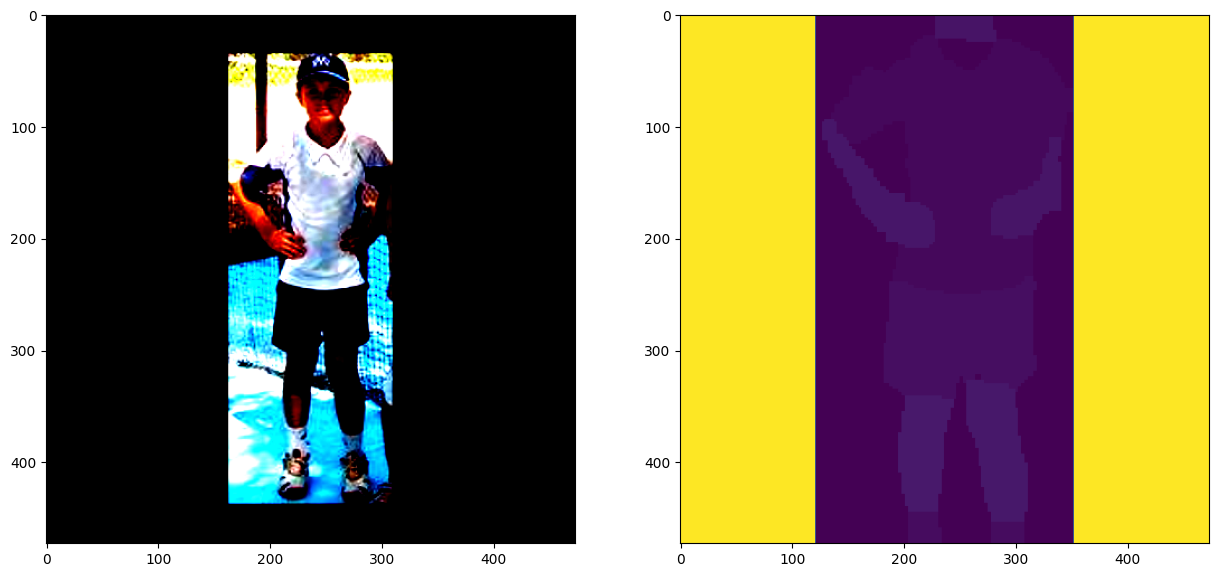

In [37]:
plot_sample(train_dataset, 0)

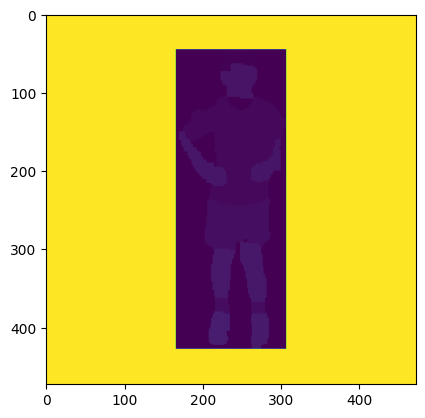

In [41]:
seg_img = train_dataset[0][1]

plt.imshow(seg_img)

In [45]:
seg_img_flat = seg_img.view(-1)
np.unique(seg_img_flat, return_counts=True)

(array([  0,   1,   5,   8,   9,  13,  14,  15,  16,  17,  18,  19, 255],
       dtype=uint8),
 array([ 28434,    892,  10323,    603,   4378,   1620,   1029,   1456,
          1884,   1477,    927,    980, 169726]))

In [ ]:
data_dir = "./data/LIP"



### Lite HRNet Setup

In [1]:
import mmcv
import mmpose

print(mmcv.__version__)
print(mmpose.__version__)

/mnt/anaconda3/envs/schp_lite/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


1.4.8
0.29.0


In [6]:
from networks.backbone.Lite_HRNET import LiteHRNet

# model settings
model_18_small_cfg = dict(
    type='TopDown',
    pretrained=None,
    backbone=dict(
        type='LiteHRNet',
        in_channels=3,
        extra=dict(
            stem=dict(stem_channels=32, out_channels=32, expand_ratio=1),
            num_stages=3,
            stages_spec=dict(
                num_modules=(2, 4, 2),                          #TODO Doubt: What do these mean
                num_branches=(2, 3, 4),                         #These correspond to the parallel multi-resolution branches. So, stage 1 has two parallel branches, stage 2 has three parallel branches, etc.
                num_blocks=(2, 2, 2),
                module_type=('LITE', 'LITE', 'LITE'),
                with_fuse=(True, True, True),
                reduce_ratios=(8, 8, 8),
                num_channels=(
                    (40, 80),
                    (40, 80, 160),
                    (40, 80, 160, 320),
                )),
            with_head=False,
        )))

model_30_large_cfg = dict(
    type='TopDown',
    pretrained=None,
    backbone=dict(
        type='LiteHRNet',
        in_channels=3,
        extra=dict(
            stem=dict(  
                stem_channels=32,
                out_channels=32,
                expand_ratio=1),
            num_stages=3,
            stages_spec=dict(
                num_modules=(3, 8, 3),
                num_branches=(2, 3, 4),
                num_blocks=(2, 2, 2),
                module_type=('LITE', 'LITE', 'LITE'),
                with_fuse=(True, True, True),
                reduce_ratios=(8, 8, 8),
                num_channels=(
                    (40, 80),
                    (40, 80, 160),
                    (40, 80, 160, 320),
                )),
            with_head=True,
            )))

model_30_small_cfg = dict(
            stem=dict(  
                stem_channels=32,
                out_channels=32,
                expand_ratio=1),
            num_stages=3,
            stages_spec=dict(
                num_modules=(3, 8, 3),
                num_branches=(2, 3, 4),
                num_blocks=(2, 2, 2),
                module_type=('LITE', 'LITE', 'LITE'),
                with_fuse=(True, True, True),
                reduce_ratios=(8, 8, 8),
                num_channels=(
                    (40, 80),
                    (40, 80, 160),
                    (40, 80, 160, 320),
                )),
            with_head=True,
            )

model_custom_cfg = dict(
    type='TopDown',
    pretrained=None,
    backbone=dict(
        type='LiteHRNet',
        in_channels=3,
        extra=dict(
            stem=dict(stem_channels=32, out_channels=32, expand_ratio=1),
            num_stages=3,
            stages_spec=dict(
                num_modules=(2, 4, 2),                          #TODO Doubt: What do these mean
                num_branches=(2, 3, 4),                         #These correspond to the parallel multi-resolution branches. So, stage 1 has two parallel branches, stage 2 has three parallel branches, etc.
                num_blocks=(2, 2, 2),
                module_type=('LITE', 'LITE', 'LITE'),
                with_fuse=(True, True, True),
                reduce_ratios=(8, 8, 8),
                num_channels=(
                    (128, 256),
                    (128, 256, 512),
                    (128, 256, 512, 1024),
                )),
            with_head=False,
        )))

# extra_cfg = model_18_small_cfg["backbone"]["extra"]
# extra_cfg = model_30_large_cfg["backbone"]["extra"]
extra_cfg = model_30_small_cfg
# extra_cfg = model_custom_cfg["backbone"]["extra"]




In [7]:
extra_cfg

{'stem': {'stem_channels': 32, 'out_channels': 32, 'expand_ratio': 1},
 'num_stages': 3,
 'stages_spec': {'num_modules': (3, 8, 3),
  'num_branches': (2, 3, 4),
  'num_blocks': (2, 2, 2),
  'module_type': ('LITE', 'LITE', 'LITE'),
  'with_fuse': (True, True, True),
  'reduce_ratios': (8, 8, 8),
  'num_channels': ((40, 80), (40, 80, 160), (40, 80, 160, 320))},
 'with_head': True}

In [8]:
model = LiteHRNet(extra = extra_cfg)

print(f"Trainable Params:", sum(p.numel() for p in model.parameters() if p.requires_grad))

Trainable Params: 1763020


In [ ]:
## Load pretrained weights
import torch

path_weights = "checkpoints/litehrnet_30_coco_256x192.pth"

saved_state_dict = torch.load(path_weights)["state_dict"]
filt_state_dict = {}
for k in saved_state_dict:
    if k.split(".")[0] == "backbone":
        new_k = ".".join(k.split(".")[1:])
    else:
        new_k = k

    filt_state_dict[new_k] = saved_state_dict[k]

model.load_state_dict(filt_state_dict, strict=False)

_IncompatibleKeys(missing_keys=[], unexpected_keys=['keypoint_head.final_layer.weight', 'keypoint_head.final_layer.bias'])

In [25]:
from torch.utils import data
import torchvision.transforms as transforms
import torch.optim as optim

from datasets.datasets import LIPDataSet

IMAGE_MEAN = [0.406, 0.456, 0.485]
IMAGE_STD =  [0.225, 0.224, 0.229]

# Data Loader
print('BGR Transformation')
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(mean=IMAGE_MEAN,
                            std=IMAGE_STD),
])

data_dir = "./data/LIP"
input_size = [128,128]
num_samples = 2500
batch_size=8
gpus = [0]

train_dataset = LIPDataSet(data_dir, 'train', crop_size=input_size, 
                           transform=transform, num_samples=num_samples)
train_loader = data.DataLoader(train_dataset, batch_size=batch_size * len(gpus),
                                num_workers=16, shuffle=True, pin_memory=True, drop_last=True)


learning_rate = 7e-3
momentum = 0.9
weight_decay = 5e-4

trainable = [p for p in model.parameters() if p.requires_grad]
optimizer = optim.SGD(trainable, lr=learning_rate, momentum=momentum,
                            weight_decay=weight_decay)

BGR Transformation


In [26]:
from tqdm import tqdm

for epoch in range(5):
    track_loss = []

    model.train()
    for i_ter, batch in enumerate(tqdm(train_loader)):

        images, labels, _ = batch
        labels = labels.cuda(non_blocking=True)

        preds = model(images)


        break
    break


for pred in preds:
    print(pred.shape)


  0%|          | 0/312 [00:05<?, ?it/s]

torch.Size([8, 128, 32, 32])
torch.Size([8, 256, 16, 16])
torch.Size([8, 512, 8, 8])
torch.Size([8, 1024, 4, 4])


In [21]:
for pred in preds:
    print(pred.shape)

torch.Size([8, 40, 32, 32])
torch.Size([8, 40, 16, 16])
torch.Size([8, 80, 8, 8])
torch.Size([8, 160, 4, 4])


### Plotting Loss

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os

path = "/mnt/Self-Correction-Human-Parsing/log/schp_stand/loss_per_epoch.txt"
#path = "/mnt/Self-Correction-Human-Parsing/log/schp_cons_loss_01/loss_per_epoch.txt"
#path = "/mnt/Self-Correction-Human-Parsing/log/schp_cons_loss_03/loss_per_epoch.txt"
# path = "/mnt/Self-Correction-Human-Parsing/log/schp_cons_loss_1/loss_per_epoch.txt"
#path = "/mnt/Self-Correction-Human-Parsing/log/schp_fusion_conv/loss_per_epoch.txt"
#path = "/mnt/Self-Correction-Human-Parsing/log/schp_fusion_conv_train/loss_per_epoch.txt"
#path = "/mnt/Self-Correction-Human-Parsing/log/schp_fusion_attn/loss_per_epoch.txt"
# path = "/mnt/Self-Correction-Human-Parsing/log/schp_fusion_attn_4_train/loss_per_epoch.txt"
# path = "/mnt/Self-Correction-Human-Parsing/log/schp_fusion_attn_1/loss_per_epoch.txt"
# path = "/mnt/Self-Correction-Human-Parsing/log/schp_multiscale/loss_per_epoch.txt"
#path = "/mnt/Self-Correction-Human-Parsing/log/schp_multiscale_train/loss_per_epoch.txt"
# path = "/mnt/Self-Correction-Human-Parsing/log/schp_opt_adamw/loss_per_epoch.txt"

# path = "/mnt/Self-Correction-Human-Parsing/log/schp_multiscale_blocks_3/loss_per_epoch.txt"
# path = "/mnt/Self-Correction-Human-Parsing/log/schp_mod/loss_per_epoch.txt"
# path = "/mnt/Self-Correction-Human-Parsing/log/schp_fusion_conv_blocks/loss_per_epoch.txt"
# path = "/mnt/Self-Correction-Human-Parsing/log/schp_fusion_conv_alt/loss_per_epoch.txt"
# path = "/mnt/Self-Correction-Human-Parsing/log/schp_fusion_conv_alt_edge3/loss_per_epoch.txt"
# path = "/mnt/Self-Correction-Human-Parsing/log/schp_fusion_conv_alt_blocks/loss_per_epoch.txt"

# path = "/mnt/Self-Correction-Human-Parsing/log/schp_multiscale_btw3/loss_per_epoch.txt"
# path = "/mnt/Self-Correction-Human-Parsing/log/schp_multiscale_btw3_multi/loss_per_epoch.txt"

path = "/mnt/Self-Correction-Human-Parsing/log/hrnet_schp/naive/loss_per_epoch.txt"

with open(path, "r") as f:
    data = f.readlines()

data = np.array([[float(elem) for elem in row.strip().split(",")] for row in data])#[:157]
data.shape

(150, 5)

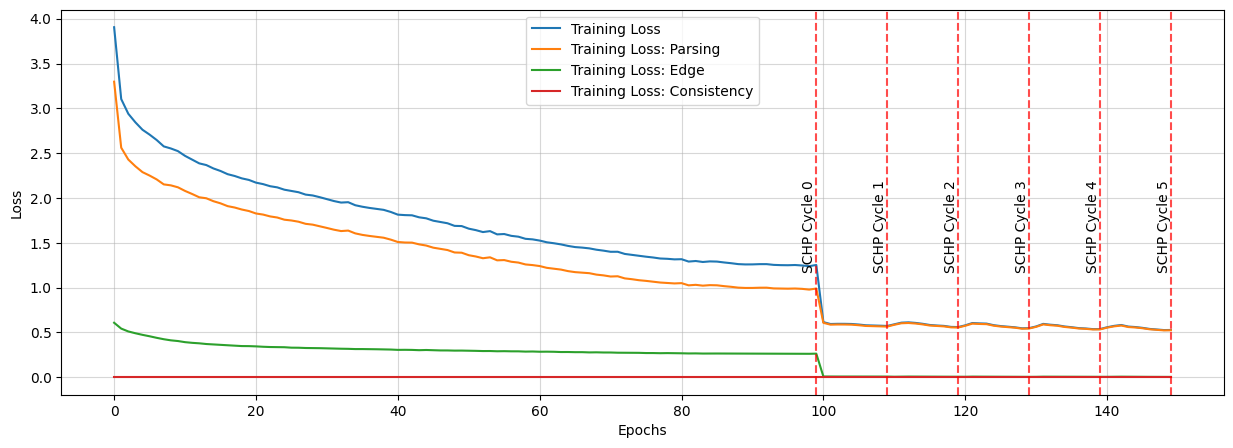

Total Loss at epoch 150: 0.5270468592643738


In [2]:
fig, ax = plt.subplots(1, 1, figsize=(15, 5))

#data = data[:72]

ax.plot(data[:, 0], data[:, 1], label="Training Loss")
ax.plot(data[:, 0], data[:, 2], label="Training Loss: Parsing")
ax.plot(data[:, 0], data[:, 3], label="Training Loss: Edge")
ax.plot(data[:, 0], data[:, 4], label="Training Loss: Consistency")

num_cycles = 6
schp_start_cycle = 99
epochs_per_cycle = 10
schp_end_cycle = schp_start_cycle + num_cycles * epochs_per_cycle
for count, line_x in enumerate(np.arange(schp_start_cycle, schp_end_cycle, epochs_per_cycle)):

    ax.axvline(line_x, linestyle="dashed", alpha=0.7, color="red")
    ax.text(line_x-2, 1.2, f"SCHP Cycle {count}", rotation=90)

plt.grid(True, alpha=0.5)
plt.legend()
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()

print(f"Total Loss at epoch {len(data)}: {data[-1, 1]}")

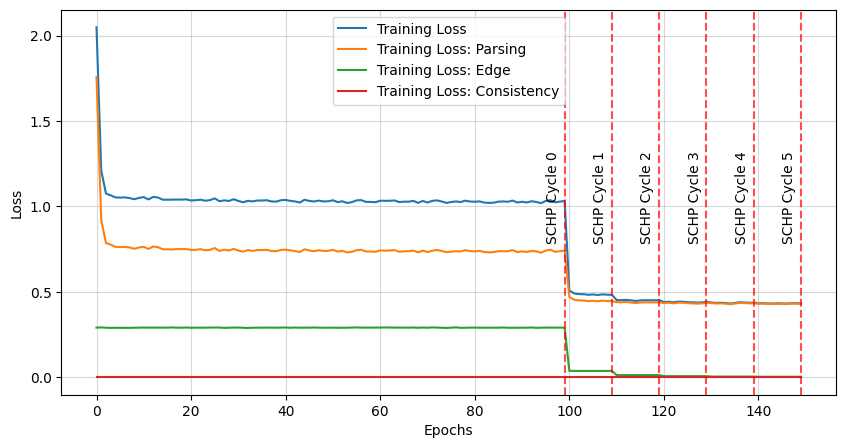

Total Loss at epoch 150: 0.4320424497127533


In [86]:
fig, ax = plt.subplots(1, 1, figsize=(10, 5))

ax.plot(data[:, 0], data[:, 1], label="Training Loss")
ax.plot(data[:, 0], data[:, 2], label="Training Loss: Parsing")
ax.plot(data[:, 0], data[:, 3], label="Training Loss: Edge")
ax.plot(data[:, 0], data[:, 4], label="Training Loss: Consistency")

num_cycles = 6
schp_start_cycle = 99
epochs_per_cycle = 10
schp_end_cycle = schp_start_cycle + num_cycles * epochs_per_cycle
for count, line_x in enumerate(np.arange(schp_start_cycle, schp_end_cycle, epochs_per_cycle)):

    ax.axvline(line_x, linestyle="dashed", alpha=0.7, color="red")
    ax.text(line_x-4, 0.8, f"SCHP Cycle {count}", rotation=90)

plt.grid(True, alpha=0.5)
plt.legend()
plt.xlabel("Epochs")
plt.ylabel("Loss")
# plt.xlim(60, 80)
# plt.ylim(0.5, 1)
plt.show()

print(f"Total Loss at epoch {len(data)}: {data[-1, 1]}")

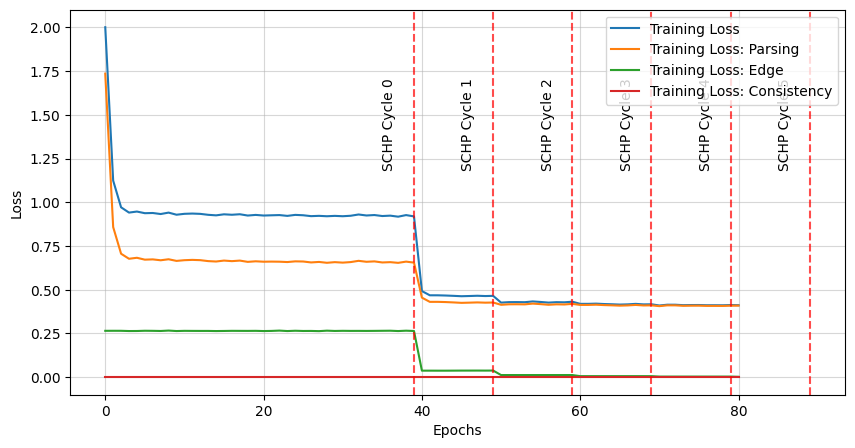

Total Loss at epoch 81: 0.41164788603782654


In [30]:
fig, ax = plt.subplots(1, 1, figsize=(10, 5))

ax.plot(data[:, 0], data[:, 1], label="Training Loss")
ax.plot(data[:, 0], data[:, 2], label="Training Loss: Parsing")
ax.plot(data[:, 0], data[:, 3], label="Training Loss: Edge")
ax.plot(data[:, 0], data[:, 4], label="Training Loss: Consistency")

num_cycles = 6
schp_start_cycle = 39
epochs_per_cycle = 10
schp_end_cycle = schp_start_cycle + num_cycles * epochs_per_cycle
for count, line_x in enumerate(np.arange(schp_start_cycle, schp_end_cycle, epochs_per_cycle)):

    ax.axvline(line_x, linestyle="dashed", alpha=0.7, color="red")
    ax.text(line_x-4, 1.2, f"SCHP Cycle {count}", rotation=90)

plt.grid(True, alpha=0.5)
plt.legend()
plt.xlabel("Epochs")
plt.ylabel("Loss")
# plt.xlim(60, 80)
# plt.ylim(0.5, 1)
plt.show()

print(f"Total Loss at epoch {len(data)}: {data[-1, 1]}")

In [ ]:
path = "/mnt/Self-Correction-Human-Parsing/log/schp_fusion_conv"

import os

count = 0

for file in os.listdir(path):

    if not file.__contains__("checkpoint_"): continue
    count += 1

    num = int(file.split("_")[-1].split(".")[0])
    if num < 100:
        file_path = os.path.join(path, file)
        # os.remove(file_path)

count

15

In [35]:
path = "log/schp_multiscale_train/schp_stand_checkpoint.pth.tar"

import torch
d = torch.load(path)
d.keys()

dict_keys(['state_dict', 'cycle_n'])

In [ ]:
d_new = {"state_dict": d["state_dict"]}


In [18]:
"10".isdigit()

True

In [ ]:
# path = "log/"

# import os
# import shutil

# for dir_name in os.listdir(path):

#     if not dir_name.__contains__("schp"): continue
#     print(dir_name)

#     get_num = lambda s: int(s.split("_")[1]) if s.split("_")[1].isdigit() else 0
#     schp_nums = [get_num(name) for name in os.listdir(os.path.join(path, dir_name)) if name.__contains__('schp_')]
#     if len(schp_nums) > 0: schp_max_num = max(schp_nums)
#     else: continue

#     for file_name in os.listdir(os.path.join(path, dir_name)):
#         if file_name.__contains__("checkpoint_"):
#             os.remove(os.path.join(path, dir_name, file_name))

#         if file_name.__contains__("schp_"):
#             file_num = get_num(file_name)
#             if file_num == schp_max_num: continue

#             os.remove(os.path.join(path, dir_name, file_name))



schp_cons_loss_1
schp_multiscale_btw3_multi
schp_multiscale_btw3
schp_fusion_conv_blocks
schp_multiscale_train
schp_fusion_conv_train
schp_fusion_attn_4_train
schp_fusion_conv_alt
schp_fusion_attn_1
schp_cons_loss_01
schp_cons_loss_03
schp_multiscale
schp_fusion_attn
schp_mod
schp_multiscale_blocks_3
schp_stand
schp_fusion_conv_alt_edge3
schp_fusion_conv_alt_blocks
schp_fusion_conv
